# Predict someone is likely to leave organization or not

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data_dir=r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\Ensemble Models\Data-1\Data'

In [3]:
os.chdir(data_dir)

In [4]:
df=pd.read_csv('HR_comma_sep.csv')

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
df['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [10]:
df.rename(columns={'sales':'dept'},inplace=True)

In [11]:
df['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [12]:
X=df.drop('left',axis=1)
y=df['left']

In [13]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [14]:
X=pd.get_dummies(X)

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)

In [20]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
clf.score(X_test,y_test)

0.974

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,y_train)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
                                                  pres

In [24]:
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
clf.score(X_test,y_test)

0.9743333333333334

In [27]:
clf.feature_importances_

array([5.42605861e-01, 9.87507037e-02, 1.14253186e-01, 7.42086956e-02,
       1.66362150e-01, 1.11344127e-03, 1.06925506e-04, 1.01338047e-04,
       1.22387807e-04, 8.47228502e-05, 3.08801164e-05, 5.33784404e-05,
       0.00000000e+00, 8.99324385e-05, 7.99401343e-06, 9.34317188e-05,
       2.88849992e-04, 6.12687452e-04, 1.11282520e-03, 6.08032336e-07])

In [28]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

satisfaction_level       5.426059e-01
time_spend_company       1.663621e-01
number_project           1.142532e-01
last_evaluation          9.875070e-02
average_montly_hours     7.420870e-02
Work_accident            1.113441e-03
salary_low               1.112825e-03
salary_high              6.126875e-04
dept_technical           2.888500e-04
dept_RandD               1.223878e-04
promotion_last_5years    1.069255e-04
dept_IT                  1.013380e-04
dept_support             9.343172e-05
dept_product_mng         8.993244e-05
dept_accounting          8.472285e-05
dept_management          5.337844e-05
dept_hr                  3.088012e-05
dept_sales               7.994013e-06
salary_medium            6.080323e-07
dept_marketing           0.000000e+00
dtype: float64

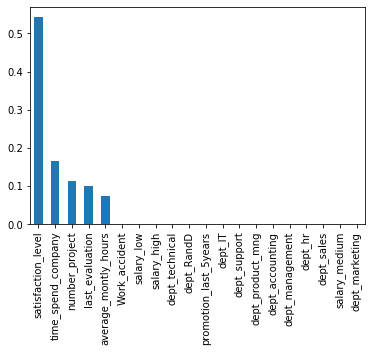

In [29]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

In [30]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)


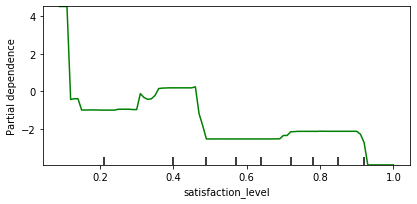

In [31]:
fig,axs=plot_partial_dependence(clf, X, [0],feature_names=X.columns.tolist())